### FIFA WORLD CUP 2022
International soccer matches and team strengths (1993-2022)

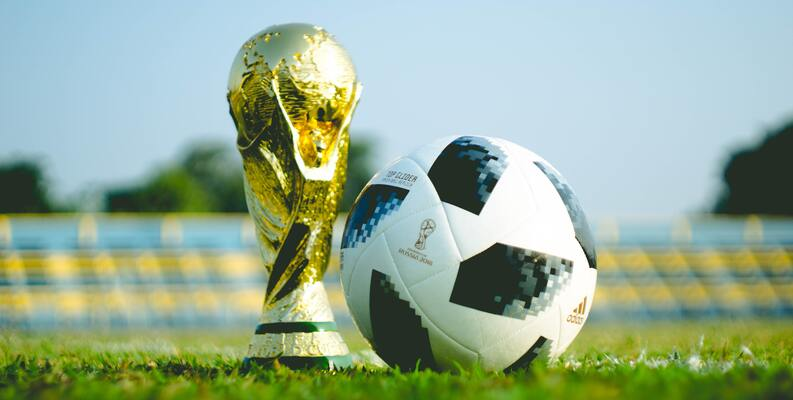

### INTRODUCTION
The FIFA World Cup is the most prestigious football tournament in the world. The championship has been awarded every four years since the start of the tournament in 1930.

The current format involves a qualification phase, which takes place over the preceding three years, to determine which teams quality for the tournament. In the tournament, 32 teams, including the host nation, compete for the title at different stadiums in the host country.

The reigning champion is France, which beat Croatia in the 2018 tournament in Russia. Qatar will host the 2022 tournament, for which the first match will be played in November.

In this project I want to find out, Is there really such a thing as a home team advantage?  What team has the strongest defense, midfield, and offense teams? Which team has the most win?

In [1]:
#import the libraries needed for our analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [2]:
# read the dataset

data = pd.read_csv(r"C:\Users\23480\Desktop\skillup\international_matches.csv")
data.head(10)

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1993-08-08,Peru,Colombia,South America,South America,70,19,0,0,0,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1993-08-08,Zimbabwe,Eswatini,Africa,Africa,50,102,0,0,2,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1993-08-09,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,4,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1993-08-11,Faroe Islands,Norway,Europe,Europe,111,9,0,0,0,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1993-08-11,Sweden,Switzerland,Europe,Europe,4,3,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#get a brief insight about the data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date                           23921 non-null  object 
 1   home_team                      23921 non-null  object 
 2   away_team                      23921 non-null  object 
 3   home_team_continent            23921 non-null  object 
 4   away_team_continent            23921 non-null  object 
 5   home_team_fifa_rank            23921 non-null  int64  
 6   away_team_fifa_rank            23921 non-null  int64  
 7   home_team_total_fifa_points    23921 non-null  int64  
 8   away_team_total_fifa_points    23921 non-null  int64  
 9   home_team_score                23921 non-null  int64  
 10  away_team_score                23921 non-null  int64  
 11  tournament                     23921 non-null  object 
 12  city                           23921 non-null 

# Question 1

### Is there really such a thing as a home team advantage?

In [4]:
#I will select the required columns I need and create a new dataframe. 
hometeam = data[['date','home_team_score','away_team_score']]

hometeam



,date,home_team_score,away_team_score
0,1993-08-08,3,1
1,1993-08-08,1,1
2,1993-08-08,5,0
3,1993-08-08,1,0
4,1993-08-08,1,3
...,...,...,...
23916,2022-06-14,2,1
23917,2022-06-14,0,2
23918,2022-06-14,0,0
23919,2022-06-14,0,3


In [5]:
#I will check for all the times hometeam won their games. 
hometeam['home_team_score']>hometeam['away_team_score']
home_wins = hometeam.loc[hometeam['home_team_score']>hometeam['away_team_score']]
home_wins

,date,home_team_score,away_team_score
0,1993-08-08,3,1
2,1993-08-08,5,0
3,1993-08-08,1,0
6,1993-08-08,2,0
7,1993-08-09,4,0
...,...,...,...
23908,2022-06-14,3,2
23912,2022-06-14,3,2
23915,2022-06-14,2,0
23916,2022-06-14,2,1


The above table shows that there are 11591 home team wins, this does not include draws.

In [6]:
#I will check for all the times hometeam lost their games
hometeam['home_team_score']<hometeam['away_team_score']
home_loss = hometeam.loc[hometeam['home_team_score']<hometeam['away_team_score']]
home_loss

,date,home_team_score,away_team_score
4,1993-08-08,1,3
5,1993-08-08,0,1
8,1993-08-11,0,7
9,1993-08-11,1,2
26,1993-08-31,0,1
...,...,...,...
23909,2022-06-14,0,1
23910,2022-06-14,1,4
23913,2022-06-14,0,3
23917,2022-06-14,0,2


The above table shows that there are 6623 home team loss, this does not include draws.

In [7]:
# I merge both tables 
home_ad = home_wins[['date', 'home_team_score', 'away_team_score']].rename(columns = {'home_team_score': 'Home_team_win', 'away_team_score' :'Home_team_loss'})
away_ad = home_loss[['date', 'home_team_score', 'away_team_score']].rename(columns = {'home_team_score': 'Home_team_win', 'away_team_score' :'Home_team_loss'})
home_advantage = home_ad.append(away_ad)

home_advantage

,date,Home_team_win,Home_team_loss
0,1993-08-08,3,1
2,1993-08-08,5,0
3,1993-08-08,1,0
6,1993-08-08,2,0
7,1993-08-09,4,0
...,...,...,...
23909,2022-06-14,0,1
23910,2022-06-14,1,4
23913,2022-06-14,0,3
23917,2022-06-14,0,2


In [8]:
#I get the adverage of the home team's wins and losses. 
home_advantage.mean()

Home_team_win     1.854837
Home_team_loss    1.144394
dtype: float64

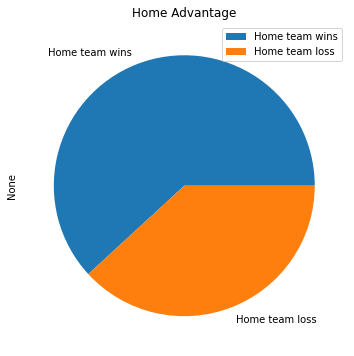

In [9]:
#Visual representation of the home team advantage
home_advantage.mean().plot(kind='pie', title='Home Advantage', labels =['Home team wins','Home team loss'], figsize=(6,6))
plt.legend();


The number of games won by home teams is higher compared to the number of games lost by home teams. This shows that there is a huge influence when teams play at home.

# Question 2

### What team has the strongest defense, midfield, and offense players

## Top 10 Strongest defense

In [10]:
#I create a home and away defense table and  merge both defense tables.

home_defense = data[['date','home_team','home_team_mean_defense_score']].rename(columns= {'home_team':'team','home_team_mean_defense_score':'defense_score'})
home_defense

away_defense = data[['date','away_team','away_team_mean_offense_score']].rename(columns= {'away_team':'team','away_team_mean_offense_score':'defense_score'})
away_defense

#merge both tables
defense = home_defense.append(away_defense)

#drop nun values in the defense score column.
defense.dropna(subset=['defense_score'],inplace=True)
defense


,date,team,defense_score
8263,2004-09-03,Netherlands,85.0
8264,2004-09-03,Spain,86.5
8266,2004-09-04,Austria,76.2
8268,2004-09-04,Belgium,81.0
8269,2004-09-04,Burkina Faso,58.8
...,...,...,...
23912,2022-06-14,Finland,72.3
23913,2022-06-14,Montenegro,74.7
23918,2022-06-14,Ghana,76.0
23919,2022-06-14,Tunisia,72.3


In [11]:
#for clearity i will sort the values.
#sort the values 
defense_top = defense.sort_values(by=['team','date'],ascending = [True,False])
defense_top

,date,team,defense_score
23889,2022-06-13,Albania,76.2
23828,2022-06-10,Albania,76.2
23754,2022-06-06,Albania,70.0
23593,2022-03-29,Albania,76.2
23553,2022-03-26,Albania,70.0
...,...,...,...
11620,2008-07-27,Zimbabwe,65.7
11495,2008-06-14,Zimbabwe,65.7
11382,2008-06-01,Zimbabwe,65.7
11212,2008-03-26,Zimbabwe,65.7


In [12]:
#observe that there are duplicate records of teams but what I need is the 10 strongest team.
#Remove the duplicate values and get the top 10 defense
defense_top_10 = defense_top.drop_duplicates(subset=["team"], keep='last').nlargest(10, 'defense_score')
defense_top_10

,date,team,defense_score
8278,2004-09-04,Italy,91.8
8297,2004-09-05,Brazil,89.0
8266,2004-09-04,England,88.7
8275,2004-09-04,France,88.0
8318,2004-09-08,Germany,87.5
8285,2004-09-04,Argentina,87.0
8264,2004-09-03,Spain,86.5
8263,2004-09-03,Netherlands,85.0
8281,2004-09-04,Portugal,84.3
8265,2004-09-04,Greece,83.7


We can see the list of the top 10 strongest defense.

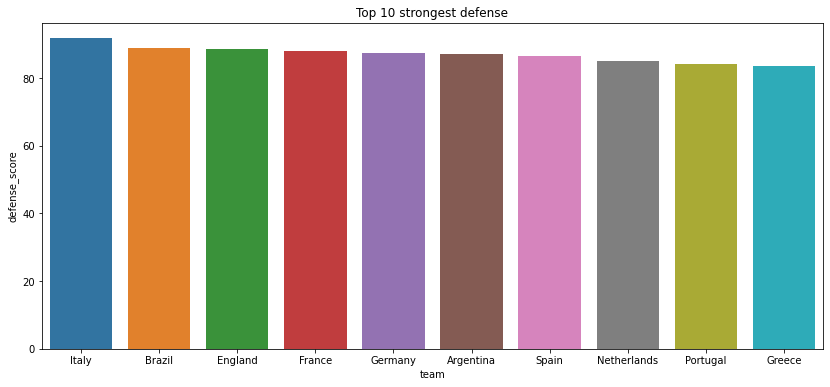

In [13]:
#Bar plot visualization of the top 10 strongest defense
plt.figure(figsize=(14,6))
plt.title("Top 10 strongest defense")
sn.barplot(data=defense_top_10, x='team',y='defense_score');

## Top 10 strongest midfield

In [14]:
#I create a home and away midfield table and  merge both midfield tables.

home_midfield = data[['date','home_team','home_team_mean_midfield_score']].rename(columns ={'home_team':'team','home_team_mean_midfield_score':'midfield_score'})
home_midfield

away_midfield = data[['date','away_team','away_team_mean_midfield_score']].rename(columns ={'away_team':'team','away_team_mean_midfield_score':'midfield_score'})
away_midfield

#merge both tables
midfield = home_midfield.append(away_midfield)

#drop nun values in the midfield score column
midfield.dropna(subset=['midfield_score'],inplace=True)
midfield


,date,team,midfield_score
8263,2004-09-03,Netherlands,87.0
8264,2004-09-03,Spain,89.5
8265,2004-09-04,Albania,74.5
8266,2004-09-04,Austria,74.0
8268,2004-09-04,Belgium,77.2
...,...,...,...
23912,2022-06-14,Finland,73.5
23913,2022-06-14,Montenegro,68.2
23918,2022-06-14,Ghana,78.2
23919,2022-06-14,Tunisia,74.0


In [15]:
#for clearity i will sort the values.
#sort the values 
midfield_top = midfield.sort_values(by=['team','date'],ascending = [True,False])
midfield_top

,date,team,midfield_score
23889,2022-06-13,Albania,73.0
23828,2022-06-10,Albania,73.0
23754,2022-06-06,Albania,73.0
23593,2022-03-29,Albania,73.0
23553,2022-03-26,Albania,73.0
...,...,...,...
9369,2006-01-05,Zimbabwe,54.2
9198,2005-10-08,Zimbabwe,54.2
9167,2005-09-25,Zimbabwe,54.2
9166,2005-09-24,Zimbabwe,54.2


In [16]:
#observe that there are duplicate records of teams but what I need is the 10 strongest team.
#Remove the duplicate values and get the top 10 midfield
midfield_top_10 = midfield_top.drop_duplicates(subset=["team"], keep='last').nlargest(10, 'midfield_score')
midfield_top_10

,date,team,midfield_score
8275,2004-09-04,France,93.2
8266,2004-09-04,England,91.2
8297,2004-09-05,Brazil,89.8
8264,2004-09-03,Spain,89.5
8285,2004-09-04,Argentina,88.5
8318,2004-09-08,Germany,87.5
8278,2004-09-04,Italy,87.5
8281,2004-09-04,Portugal,87.2
8263,2004-09-03,Netherlands,87.0
8335,2004-09-08,Czech Republic,86.8


We can see the list of the top 10 strongest midfield.


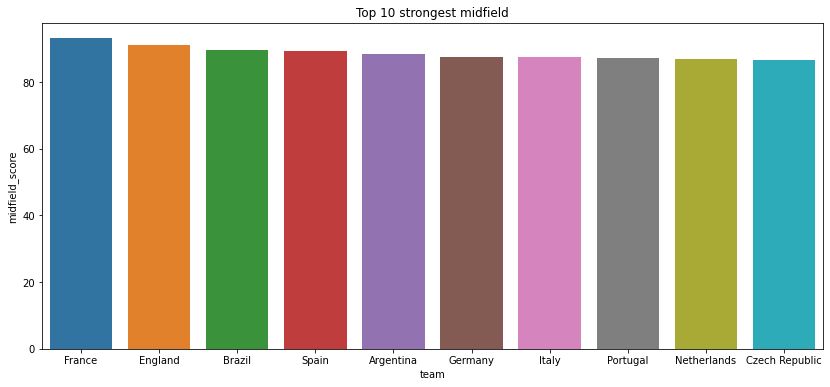

In [17]:
#Bar plot visualization of the top 10 strongest midfield
plt.figure(figsize=(14,6))
plt.title("Top 10 strongest midfield")
sn.barplot(data=midfield_top_10, x='team',y='midfield_score');

## Top 10 Stongest Offense

In [18]:
#I create a home and away offense table and  merge both offense tables.

home_offense = data[['date','home_team','home_team_mean_offense_score']].rename(columns ={'home_team':'team','home_team_mean_offense_score':'offense_score'})
home_offense

away_offense = data[['date','away_team','away_team_mean_offense_score']].rename(columns ={'away_team':'team','away_team_mean_offense_score':'offense_score'})
away_offense

#merge both tables
offense = home_offense.append(away_offense)

#drop nun values in the offense score column
offense.dropna(subset=['offense_score'],inplace=True)
offense

,date,team,offense_score
8263,2004-09-03,Netherlands,93.0
8264,2004-09-03,Spain,89.3
8265,2004-09-04,Albania,59.0
8266,2004-09-04,Austria,73.0
8268,2004-09-04,Belgium,78.0
...,...,...,...
23912,2022-06-14,Finland,72.3
23913,2022-06-14,Montenegro,74.7
23918,2022-06-14,Ghana,76.0
23919,2022-06-14,Tunisia,72.3


In [19]:
#for clearity i will sort the values.
#sort the values 
offense_top = offense.sort_values(by=['team','date'],ascending = [True,False])
offense_top

,date,team,offense_score
23889,2022-06-13,Albania,70.0
23828,2022-06-10,Albania,70.0
23754,2022-06-06,Albania,70.0
23593,2022-03-29,Albania,70.0
23553,2022-03-26,Albania,70.0
...,...,...,...
11467,2008-06-08,Zimbabwe,65.7
11382,2008-06-01,Zimbabwe,65.7
11212,2008-03-26,Zimbabwe,65.7
11184,2008-03-11,Zimbabwe,65.7


In [20]:
#observe that there are duplicate records of teams but what I need is the 10 strongest team.
#Remove the duplicate values and get the top 10 offense
offense_top_10 = offense_top.drop_duplicates(subset=["team"], keep='last').nlargest(10, 'offense_score')
offense_top_10

,date,team,offense_score
8275,2004-09-04,France,93.0
8263,2004-09-03,Netherlands,93.0
8297,2004-09-05,Brazil,92.3
8278,2004-09-04,Italy,92.3
8264,2004-09-03,Spain,89.3
8266,2004-09-04,England,88.7
8285,2004-09-04,Argentina,87.0
8272,2004-09-04,Denmark,85.0
8281,2004-09-04,Portugal,84.3
8265,2004-09-04,Greece,83.7


The list of the top 10 strongest offense

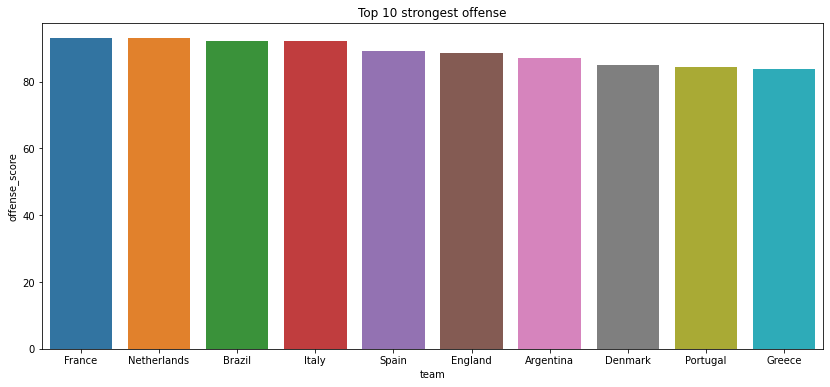

In [21]:
#Bar plot visualization of the top 10 strongest offense
plt.figure(figsize=(14,6))
plt.title("Top 10 strongest offense")
sn.barplot(data=offense_top_10, x='team',y='offense_score');

# Question 3

### which team has the most win?



In [22]:
#select the required columns I need and create a new dataframe. 
home_team = data[['date','home_team','home_team_score','away_team_score']]

home_team.head(20)


,date,home_team,home_team_score,away_team_score
0,1993-08-08,Bolivia,3,1
1,1993-08-08,Brazil,1,1
2,1993-08-08,Ecuador,5,0
3,1993-08-08,Guinea,1,0
4,1993-08-08,Paraguay,1,3
5,1993-08-08,Peru,0,1
6,1993-08-08,Zimbabwe,2,0
7,1993-08-09,Guinea,4,0
8,1993-08-11,Faroe Islands,0,7
9,1993-08-11,Sweden,1,2


In [23]:
#get more insight about the dataframe
home_team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date             23921 non-null  object
 1   home_team        23921 non-null  object
 2   home_team_score  23921 non-null  int64 
 3   away_team_score  23921 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 560.7+ KB


In [24]:
#I will check for all the hometeam that won their games. 
home_team['home_team_score']>home_team['away_team_score']
homewins = home_team.loc[hometeam['home_team_score']>home_team['away_team_score']]
homewins

,date,home_team,home_team_score,away_team_score
0,1993-08-08,Bolivia,3,1
2,1993-08-08,Ecuador,5,0
3,1993-08-08,Guinea,1,0
6,1993-08-08,Zimbabwe,2,0
7,1993-08-09,Guinea,4,0
...,...,...,...,...
23908,2022-06-14,Netherlands,3,2
23912,2022-06-14,Bosnia and Herzegovina,3,2
23915,2022-06-14,Turkey,2,0
23916,2022-06-14,Moldova,2,1


In [25]:
#I will check for all the away team that won their games
home_team['home_team_score']<home_team['away_team_score']
homeloss = home_team.loc[home_team['home_team_score']<home_team['away_team_score']]
homeloss

,date,home_team,home_team_score,away_team_score
4,1993-08-08,Paraguay,1,3
5,1993-08-08,Peru,0,1
8,1993-08-11,Faroe Islands,0,7
9,1993-08-11,Sweden,1,2
26,1993-08-31,Iceland,0,1
...,...,...,...,...
23909,2022-06-14,Poland,0,1
23910,2022-06-14,Armenia,1,4
23913,2022-06-14,Romania,0,3
23917,2022-06-14,Liechtenstein,0,2


In [26]:
# I merge the both tables 
hometeam_wins = homewins[['date', 'home_team','home_team_score', 'away_team_score']].rename(columns = {'home_team' : 'team','home_team_score': 'Home_team_win', 'away_team_score' :'away_team_win'})
awayteam_wins = homeloss[['date', 'home_team','home_team_score', 'away_team_score']].rename(columns = {'home_team': 'team','home_team_score': 'Home_team_win', 'away_team_score' :'away_team_win'})
Team_streak = hometeam_wins.append(awayteam_wins)

Team_streak

,date,team,Home_team_win,away_team_win
0,1993-08-08,Bolivia,3,1
2,1993-08-08,Ecuador,5,0
3,1993-08-08,Guinea,1,0
6,1993-08-08,Zimbabwe,2,0
7,1993-08-09,Guinea,4,0
...,...,...,...,...
23909,2022-06-14,Poland,0,1
23910,2022-06-14,Armenia,1,4
23913,2022-06-14,Romania,0,3
23917,2022-06-14,Liechtenstein,0,2


In [27]:
#for clearity i will sort the values.
#sort the values 
top_streak = Team_streak.sort_values(by=['team','date'],ascending = [False,True])
top_streak

,date,team,Home_team_win,away_team_win
6,1993-08-08,Zimbabwe,2,0
51,1993-09-19,Zimbabwe,2,0
65,1993-09-26,Zimbabwe,1,0
699,1995-01-22,Zimbabwe,4,1
1235,1996-01-07,Zimbabwe,1,2
...,...,...,...,...
20203,2018-03-27,Afghanistan,2,1
20884,2018-12-25,Afghanistan,0,2
21562,2019-09-10,Afghanistan,1,0
21945,2019-11-19,Afghanistan,0,1


In [28]:
top_streak['team'].value_counts().nlargest(1)

USA    253
Name: team, dtype: int64

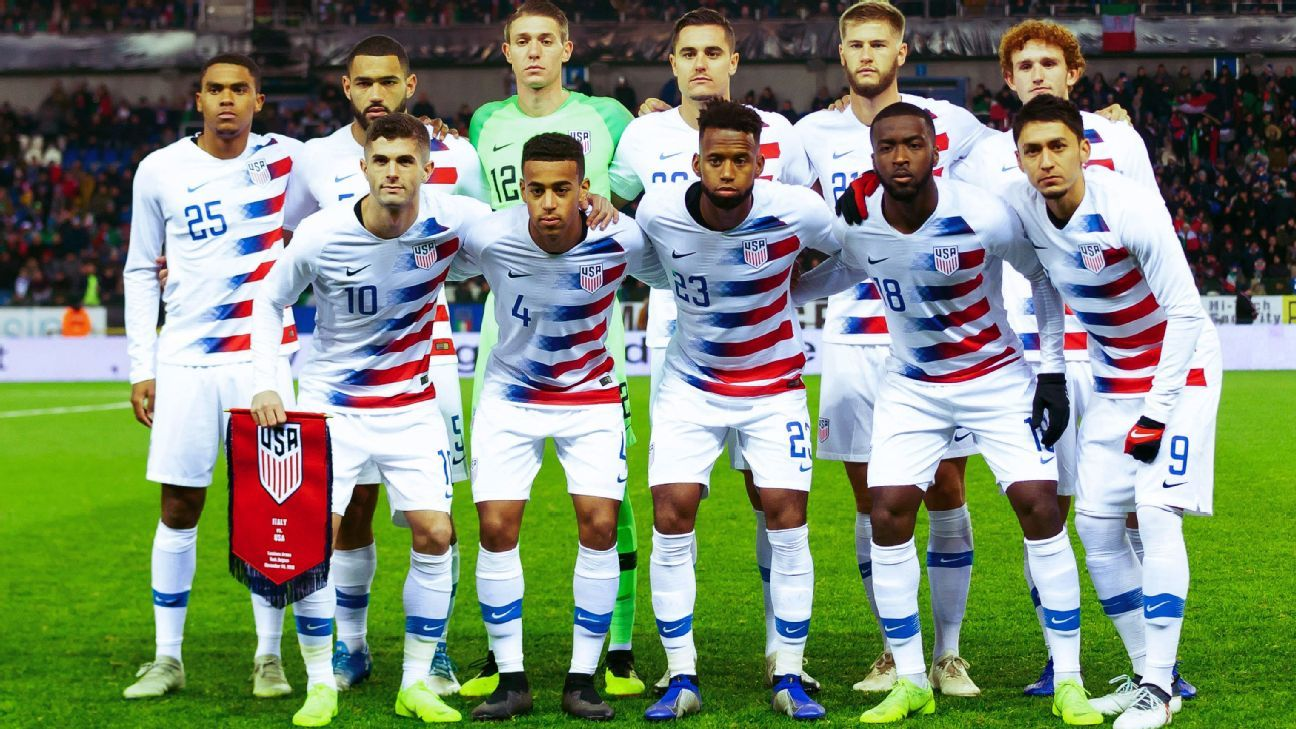

USA is the team with the most win.

# Conclusions / Observation



## From the analysis we observed that;

- There were lots of missing values in the offense mean score,defense mean score, midfield mean score for both the home and away teams. This caused alot of data loss because such were removed and not captured in the analysis

- The teams did not play the same about of matches, Some played more while some less. This influenced the number of win or loss a particular team will have over the other.

- There is a huge influence when teams play at home. They win more games compared to when they play away, this shows that Home advantage is a thing.

- The top stronget defense teams are: Italy,Brazil,England,France,Germany,Argentina,Spain,Netherlands,Portugal,Greece

- The top strongest midfield teams are: France, England,Brazil,Spain,Argentina,Germany,Italy,Portugal,Netherlands,Czech Republic

- The top strongest offense teams are : France,Netherlands,Brazil,Italy,Spain,England,Argentina,Denmark,Portugal,Greece

- USA team had the most win.


# Further Analysis

## These are some things to further find out about our data

- Which team had the most shootout 
- Do you have more win or draws in neutral locations?